<a href="https://colab.research.google.com/github/prasngit5/hypothesis_Assign_G4/blob/main/Hyp2_Female_Vs_Male_vaccinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%cd /content/drive/MyDrive/git_folder

/content/drive/MyDrive/git_folder


In [15]:
%pwd

'/content/drive/My Drive/git_folder'

In [16]:
#!git init

Reinitialized existing Git repository in /content/drive/My Drive/git_folder/.git/


In [18]:
#!git clone https://github.com/hyp-G-4/H-G-4.git

Cloning into 'H-G-4'...
fatal: could not read Username for 'https://github.com': No such device or address


In [17]:
#!git remote add origin https://github.com/hyp-G-4/H-G-4.git

fatal: remote origin already exists.


In [ ]:
#!git remote -v

In [19]:
#!git config --global user.email '{snethala@islander.tamucc.edu}'
#!git config --global user.name '{prasad}'

In [20]:
#!git add .

In [ ]:
#!git commit -m 'First Comit'

In [ ]:
#!git branch --unset-upstream

In [ ]:
#!git branch -M main

In [ ]:
#!git push -u origin main

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
link = "https://dshs.texas.gov/immunize/covid19/COVID-19-Vaccine-Data-by-County.xls"

In [ ]:

dA = pd.read_excel(link, sheet_name = 'By Age, Gender, Race')
dA=dA.truncate(after=71)  # There are extra rows in the file, just remove, should look for last county, but this is easier
dA.drop(labels=None, axis=0, index=None, columns=['Race/Ethnicity'], inplace=True)
dA

,Gender,Age Group,Doses Administered,People Vaccinated with at least One Dose,People Fully Vaccinated
0,Female,12-15 years,45030,24066,20947
1,Female,12-15 years,58230,32606,25596
2,Female,12-15 years,383226,215093,167925
3,Female,12-15 years,179142,98022,80978
4,Female,12-15 years,17650,10608,7041
...,...,...,...,...,...
67,Male,Unknown,167,131,48
68,Male,Unknown,1287,1000,367
69,Male,Unknown,367,266,115
70,Male,Unknown,643,544,111


In [ ]:
dA.keys()

Index(['Gender ', 'Age Group', 'Doses Administered',
       'People Vaccinated with at least One Dose', 'People Fully Vaccinated '],
      dtype='object')

In [ ]:
#
dA.head(7)
dA.keys()

Index(['Gender ', 'Age Group', 'Doses Administered',
       'People Vaccinated with at least One Dose', 'People Fully Vaccinated '],
      dtype='object')

In [ ]:
s = dA.groupby(['Gender ','Age Group']).sum()
s

Doses Administered  ...  People Fully Vaccinated 
Gender  Age Group                        ...                          
Female  12-15 years              850431  ...                    377531
        16-49 years             8501571  ...                   4017445
        50-64 years             3921424  ...                   1873063
        65-79 years             2778153  ...                   1285725
        80+ years                798778  ...                    368258
        Unknown                    3801  ...                       960
Male    12-15 years              849005  ...                    374281
        16-49 years             7595702  ...                   3616367
        50-64 years             3504512  ...                   1690748
        65-79 years             2281329  ...                   1056755
        80+ years                515863  ...                    235138
        Unknown                    3376  ...                       887

[12 rows x 3 columns]

Index(['Doses Administered', 'People Vaccinated with at least One Dose',
       'People Fully Vaccinated '],
      dtype='object')

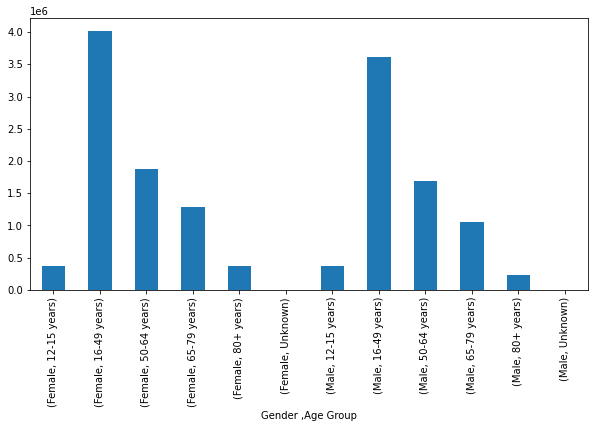

In [ ]:
fig = plt.figure(figsize=(10,5))
s['People Fully Vaccinated '].plot(kind='bar') 
s

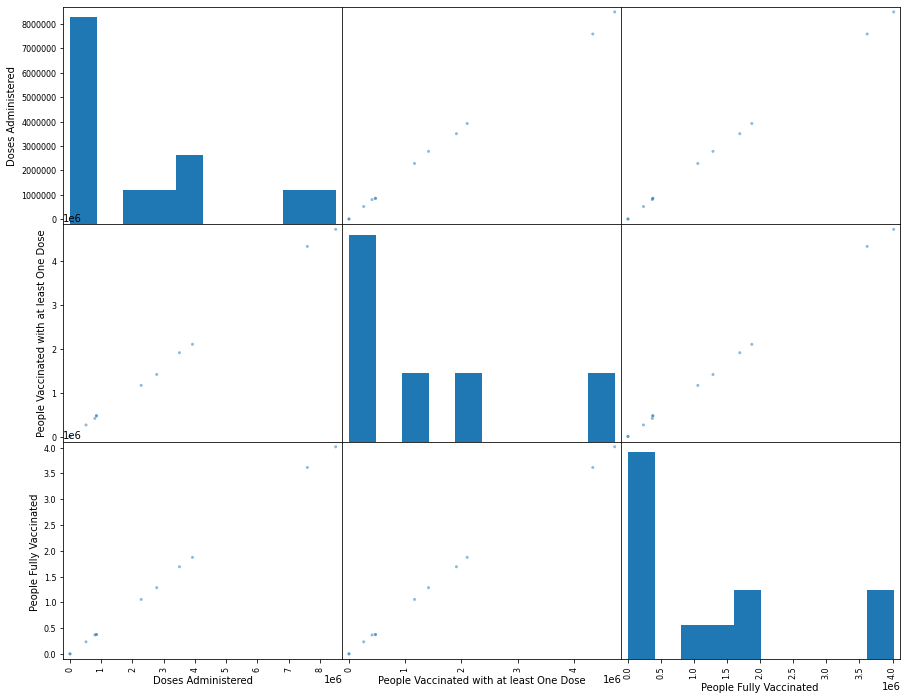

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(s, figsize = (15,12))
plt.show()

In [ ]:
s.keys()


Index(['Doses Administered', 'People Vaccinated with at least One Dose',
       'People Fully Vaccinated '],
      dtype='object')

In [ ]:
female =s.loc['Female', 'People Fully Vaccinated ']
male = s.loc['Male', 'People Fully Vaccinated ']


Age Group
12-15 years     374281
16-49 years    3616367
50-64 years    1690748
65-79 years    1056755
80+ years       235138
Unknown            887
Name: People Fully Vaccinated , dtype: int64

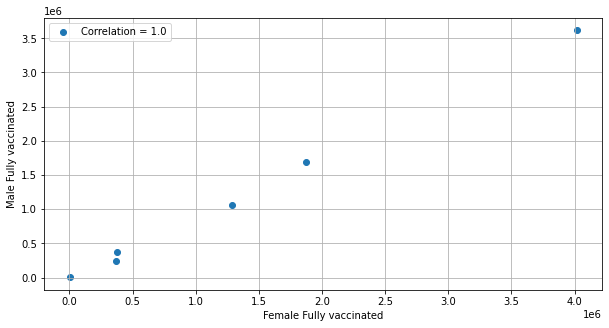

In [ ]:

#plot 1:
fig = plt.figure(figsize=(10,5))
#plt.subplot(1, 2, 1)

#plt.scatter(female, male)
plt.scatter(female, male, label=f'Correlation = {np.round(np.corrcoef(female, male)[0,1], 2)}')
#plt.scatter(rdf["Confirmed Cases"], rdf["Fatalities"], label=f'rdf["Fatalities"] Correlation = {np.round(np.corrcoef(rdf["Confirmed Cases"], rdf["Fatalities"])[0,1], 2)}')
#plt.scatter(s['Gender ', 'Age Group'], s['People Fully Vaccinated '], label= f's["People Fully Vaccinated"] Correlation = {np.round(np.corrcoef(s['Gender ', 'Age Group'], s['People Fully Vaccinated '])[0,1], 2)}')

plt.xlabel("Female Fully vaccinated")
plt.ylabel("Male Fully vaccinated")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from scipy.stats import wilcoxon,kruskal,friedmanchisquare,f_oneway,ttest_ind,chisquare
#F, p = f_oneway(ps['A'],ps['B'],ps['C'],ps['D'])
#s,p = f_oneway(udf['Fatalities'],rdf['Fatalities'])
s,p = f_oneway(female,male)
s,p

(0.03702922099873741, 0.851257245081476)

In [ ]:
from scipy.stats import wilcoxon,kruskal,friedmanchisquare,f_oneway,ttest_ind,chisquare
#F, p = f_oneway(ps['A'],ps['B'],ps['C'],ps['D'])
#s,p = f_oneway(udf['Fatalities'],rdf['Fatalities'])
s,p = ttest_ind(female,male)
s,p

(0.19242978199524474, 0.8512572450814767)

In [ ]:
alpha = 0.05
if p < alpha:
	print('Different distributions (reject H0)')
else:
	print('Same distributions (fail to reject H0, so H0 is accepted)')
s,p 

Same distributions (fail to reject H0, so H0 is accepted)


(0.03702922099873741, 0.851257245081476)